In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import cv2 as cv
import random
from google.colab import drive
from collections import Counter

Necessary Libraries imported


In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
drive_path = '/content/drive/MyDrive/Test/Animals'

Path for available data

In [4]:
animal_class = []

for c in os.listdir(drive_path):
  animal_class.append(c)
print(animal_class)

['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger']


The File is connected successfully and we can see all the animal classes available in the file

In [5]:
test = []

for c in animal_class:
  path = os.path.join(drive_path, c)
  label_data = animal_class.index(c)

  for img in tqdm(os.listdir(path)):
    try:
      img_ar = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
      img_ar = cv.resize(img_ar, (300, 300),interpolation=cv.INTER_AREA)
      test.append([img_ar, label_data])
    except Exception as e:
      pass
print(len(test))

100%|██████████| 39/39 [00:00<00:00, 75.44it/s]

170


Images converted to grayscale for simplicity and resized to 300x300 for accuracy

In [6]:
random.shuffle(test)

Data shuffled so that there is no previous pattern

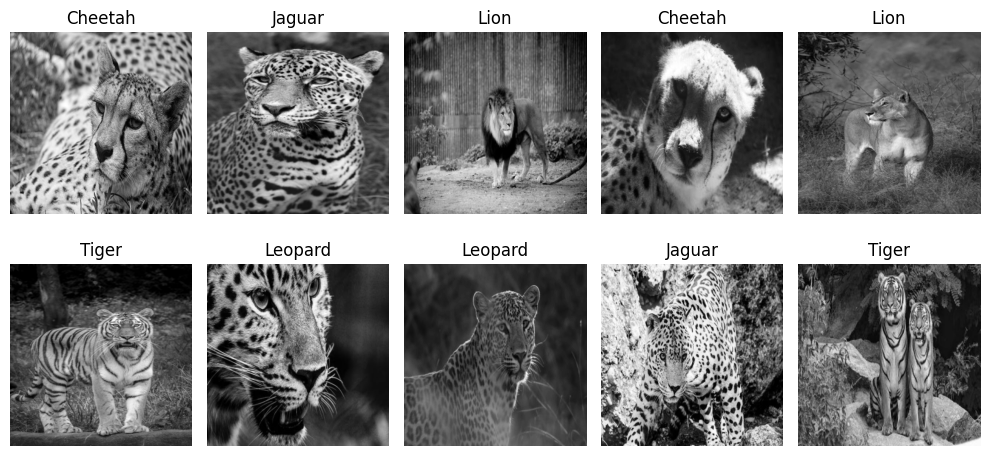

In [10]:
plt.figure(figsize=(10,5)) #This is the figure size
for i in range(10):
  plt.subplot(2,5,i+1) #plotting in 2 rows and 5 columns
  plt.imshow(test[i][0],cmap='gray')
  plt.title(animal_class[test[i][1]])
  plt.axis('off')

plt.tight_layout()
plt.show()

In [24]:
def euclidean (X1, X2):
  return np.sqrt(np.sum((X1 - X2)**2)) #formula

def KNN(data, k_val):
  efficiency = []
  for k in tqdm(k_val):
    fold_efficiency = []
    fold = np.array_split(data, 5) #spliting to 5
    for i in range(5):
      pred = 0
      valid_set = fold[i]
      train_set = np.concatenate([fold[x] for x in range(5) if x != i]) # will take other folds

      for val in valid_set:
        diff = []
        for tr in train_set:
          e_d = euclidean(tr[0], val[0])
          diff.append((e_d, tr[1]))

        diff.sort()
        k_n_label = [diff[x][1] for x in range(k)]
        c_label = Counter(k_n_label)
        mx_label = max(c_label, key = c_label.get)
        if mx_label == val[1]:
          pred += 1

      fold_efficiency.append(pred/len(valid_set))
    efficiency.append((k, fold_efficiency))


  return efficiency


Fucntions for Testing The KNN

In [25]:
train = np.array(test, dtype=object)
k_val = range(1, 31)

euclidean_efficiency = KNN(train, k_val)

for k, fold_efficiency in euclidean_efficiency:
  for efficiency in fold_efficiency:
    print(f"FOR k ={k} ====> efficiency = {efficiency:.4f}")

100%|██████████| 30/30 [01:10<00:00,  2.36s/it]

FOR k =1 ====> efficiency = 0.2941
FOR k =1 ====> efficiency = 0.3235
FOR k =1 ====> efficiency = 0.2353
FOR k =1 ====> efficiency = 0.3235
FOR k =1 ====> efficiency = 0.3529
FOR k =2 ====> efficiency = 0.2941
FOR k =2 ====> efficiency = 0.3235
FOR k =2 ====> efficiency = 0.2353
FOR k =2 ====> efficiency = 0.3235
FOR k =2 ====> efficiency = 0.3529
FOR k =3 ====> efficiency = 0.2647
FOR k =3 ====> efficiency = 0.2059
FOR k =3 ====> efficiency = 0.2059
FOR k =3 ====> efficiency = 0.3235
FOR k =3 ====> efficiency = 0.3235
FOR k =4 ====> efficiency = 0.2941
FOR k =4 ====> efficiency = 0.1765
FOR k =4 ====> efficiency = 0.2941
FOR k =4 ====> efficiency = 0.2353
FOR k =4 ====> efficiency = 0.3529
FOR k =5 ====> efficiency = 0.3235
FOR k =5 ====> efficiency = 0.2353
FOR k =5 ====> efficiency = 0.2353
FOR k =5 ====> efficiency = 0.2647
FOR k =5 ====> efficiency = 0.3824
FOR k =6 ====> efficiency = 0.3529
FOR k =6 ====> efficiency = 0.2059
FOR k =6 ====> efficiency = 0.3235
FOR k =6 ====> effic

FOR Every Value of K the we got the Efficiency We trained the model 30 times and we have 30*5 = 150 outputs

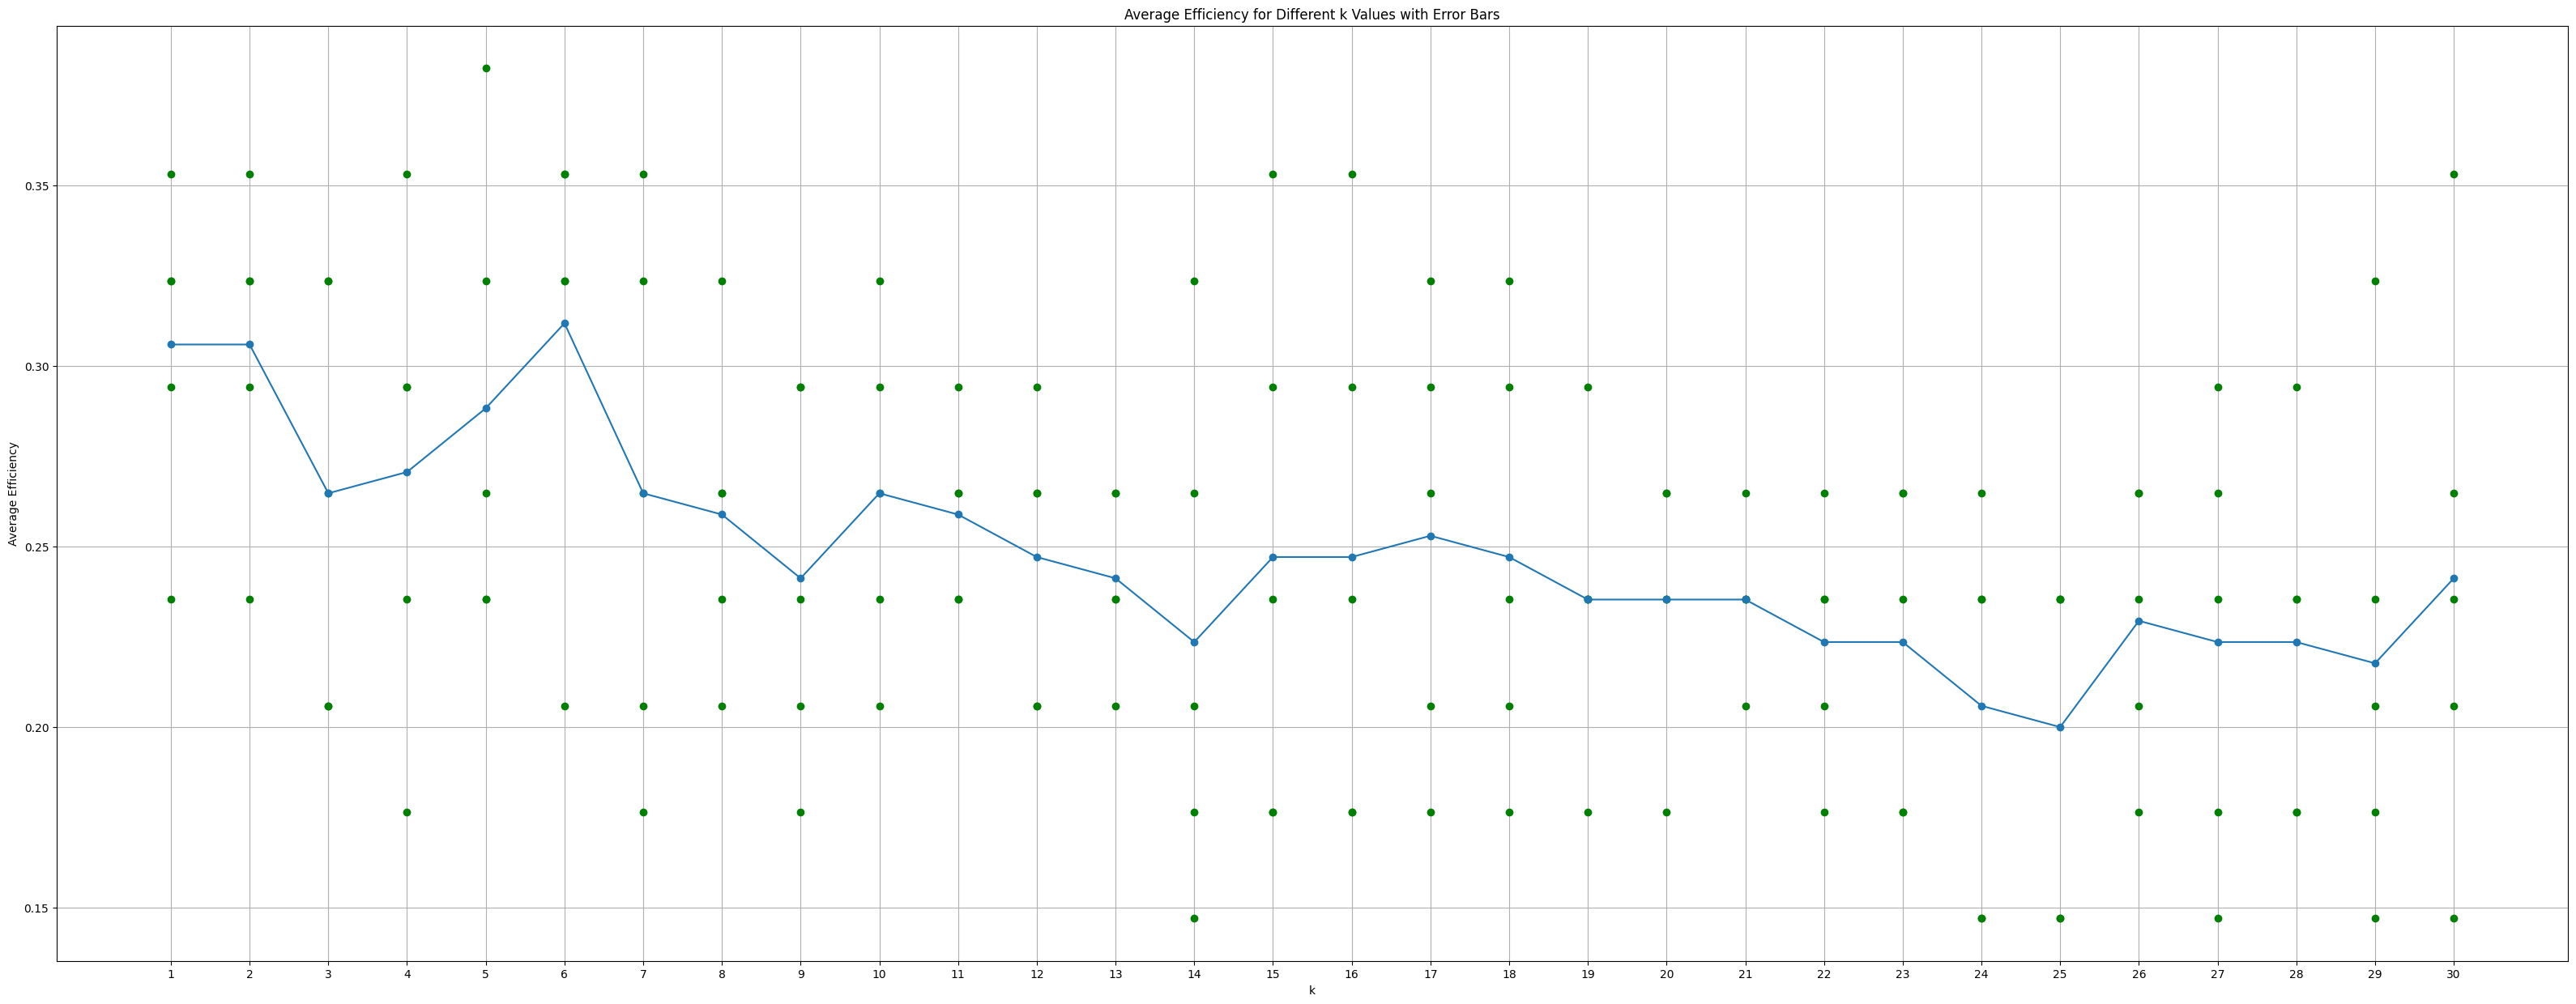

In [29]:
plt.figure(figsize= (40, 15))
i = 1
ec_std = []
ec_mean = []

for k , fe in euclidean_efficiency:
  plt.plot([k]*len(fe), fe, "go")
  ec_mean.append(np.mean(fe))

plt.errorbar(k_val, ec_mean, fmt = "-o")
plt.title('Average Efficiency for Different k Values with Error Bars')
plt.xlabel('k')
plt.ylabel('Average Efficiency')
plt.xticks(k_val)
plt.grid(True)
plt.show()


